# Homework 3: Neural Networks


This assignment is due on Moodle by **11:59pm on Friday October 25**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).


**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework, we will use [Keras](https://keras.io/) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for CPU-only of [TensorFlow](https://www.tensorflow.org/install) (version: 2.0.0) as the backend for Keras. We will use [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) as our Keras API.
```
pip install --upgrade pip
pip install tensorflow
```
**Acknowledgment** : Chris Ketelsen

Name: Karthik Siddaramanna

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

[25 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

**Part 1 [15 points]:** Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)


- $\; \texttt{NOT } x_1$ can be learned in single layer perceptron with weights $w=-1$, bias $b=0.5$ and activation function f.

$f(x)=
   \begin{cases} 
      1 & x> 0 \\
      0 & x \leq 0 
   \end{cases}
$

- $\; x_1 \texttt{ NAND } x_2$ can be learned in single layer perceptron with weights $w_1=-1$, $w_2=-1$, bias $b=1.5$ and activation function f.

$f(x)=
   \begin{cases} 
      1 & x> 0 \\
      0 & x \leq 0 
   \end{cases}
$

- $\; x_1 \texttt{ XNOR } x_2$ cannot be learned with single layer perceptron because the data points are not linearly separable.


**Part 2 [10 points]:** Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.


| $x_1$  | $x_2$  |  $x_1 XNOR x_2$ |
|---|---|---|
|  0 | 0  | 1  |
|  0 |  1 |  0 |
|   1|  0 |  0 |
|   1|   1|   1|

Neural network can contain 3 layers. One input layer with two nodes for $x_1$ and $x_2$, two hidden layers with 2 and one nodes each.

Basically we can write $x_1 XNOR x_2$ can be written as $(x_1' AND x_2') OR (x_1 AND x_2)$

Our first outer layer is the input layer with $x_1$ and $x_2$.

First hidden layer has two nodes which represent the AND functions. Weights and bias of first and second node are $w_1=-1$, $w_1=-1$, $b=0.5$ and $w_1=1$, $w_1=1$, $b=-1.5$

Second hidden layer has one node which represent the OR function. Weights and bias of the node are $w_1=1$, $w_1=1$, $b=-0.5$.



In [2]:
# YOUR CODE HERE
def activation(x):
    if(x>0):
        return 1
    return 0
    
sizes=[2,1]
lw = [[[-1,-1],[1,1]],[[1,1]]]
lb = [[0.5,-1.5],[-0.5]]
out=[]
inp=[[0,0],[0,1],[1,0],[1,1]]

for i in inp:
    a=i
    for j in range(2):
        a1 = []
        for k in range(sizes[j]):            
            a1.append(activation(np.dot(lw[j][k],a)+lb[j][k]))
        a=a1
    out.append(a)
print(out)

[[1], [0], [0], [1]]


[25 points] Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

**Part 1 [5 points]:** Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

$a^2$, $a^3$ and $a^4$ be the outputs of layer 1, 2 and 3.

$a^1=0.5$

$a^2$ = $\sigma( W^1*x+b^1) = \sigma(0) = 0.5$

$a^3$ = $\sigma( W^2*a^1+b^2)= \sigma(0) = 0.5$

$a^4$ = $\sigma( W^3*a^2+b^3)= \sigma(0) = 0.5$




**Part 2 [5 points]:** Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

For the last layer, we can write


$\delta^4=\dfrac{\partial \ell}{\partial a^4} \odot g'(z^4) = (a^4-y)*\sigma (z^4)*(1-\sigma (z^4)) = \dfrac{1}{2}*\dfrac{1}{2}*\dfrac{1}{2}=\dfrac{1}{2^3}$

$\dfrac{\partial \ell}{\partial W^4} = \delta^4*(a^3)^T = \dfrac{1}{2^3} *\dfrac{1}{2} = \dfrac{1}{2^4}$

$\dfrac{\partial \ell}{\partial b^4} = \delta^4 = \dfrac{1}{2^3}$

$\delta^3=(W^4)^T*\delta^4 \odot g'(z^3) = 1*\dfrac{1}{2^3}\dfrac{1}{2}*\dfrac{1}{2}=\dfrac{1}{2^5}$

$\dfrac{\partial \ell}{\partial W^3} = \delta^3*(a^2)^T = \dfrac{1}{2^5} *\dfrac{1}{2} = \dfrac{1}{2^6}$

$\dfrac{\partial \ell}{\partial b^3} = \delta^3 = \dfrac{1}{2^5}$

$\delta^2=(W^3)^T*\delta^3 \odot g'(z^2) = 1*\dfrac{1}{2^5}\dfrac{1}{2}*\dfrac{1}{2}=\dfrac{1}{2^7}$

$\dfrac{\partial \ell}{\partial W^2} = \delta^2*(a^1)^T = \dfrac{1}{2^7} *\dfrac{1}{2} = \dfrac{1}{2^8}$

$\dfrac{\partial \ell}{\partial b^2} = \delta^2 = \dfrac{1}{2^7}$





**Part 3 [5 points]:** Implement the following activation functions:
* ReLU
* Sigmoid
* softmax

In [3]:
def relu(x):
    # YOUR CODE HERE
    return max(0,x)

def sigmoid(x):
    # YOUR CODE HERE
    return (1.0/(1.0+math.exp(-x)))

def softmax(x):
    # YOUR CODE HERE
    return np.exp(x-np.max(x))/np.sum(np.exp(x-np.max(x)),axis=0)


In [4]:
# for grading - ignore
assert relu(5) == 5
assert relu(-5) == 0
assert relu(0) == 0
assert sigmoid(0.458) == 0.61253961344091512
assert sigmoid(2) == 0.8807970779778823
res = softmax([1,2,4])
temp = [0.04201007, 0.1141952 , 0.84379473]
for i in range(len(temp)):
    assert res[i] - temp[i] < 1e-5

**Part 4 [5 points]:** Implement the following Loss functions:
* mean squared error
* mean absolute error
* hinge

In [13]:
def mean_squared_error(yhat, y):
    # YOUR CODE HERE
    return np.mean((y-yhat)**2)
    
def mean_absolute_error(yhat, y):
    # YOUR CODE HERE
    return np.mean(np.abs(yhat-y))

def hinge(yhat, y):
    # YOUR CODE HERE
    arr = []
    for i in range(len(y)):
        arr.append(max(0,1-y[i]*yhat[i]))
    return np.mean(arr)

In [14]:
# for grading - ignore
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
assert mean_squared_error(y_pred,y_true) == 0.375
assert mean_absolute_error(y_pred,y_true) == 0.5
assert hinge(y_pred,y_true) == 0.25

**Part 5 [5 points]:** Explain the vanishing gradient problem. When would you observe this? Give an example.

Vanishing gradient is a problem where the updates to weights from the partial derivative of the loss function are not propagated effectively because of their values going close to zero. 

This is usually observed in models where the partial derivative of loss w.r.t to current weight is used to update the neural networks weights in each iteration. With increasing number of layers, as all the gradients are small(<1), the weight vectors in the initial layers do not receive an update of required value. That means, the update for the weights in the inital layers does not reflect the actual suffered loss. This results in the model taking a long time to converge or sometimes will never converge.

For example, if we consider $tanh()$ activation function on back propagation, the function has its gradient in the range $(0,1)$. If we have n layers, this gradient will be multiplied n times meanning, it decreases exponentially with n and the inital layers receive exponentially less updates.

[25 Points] Problem 3 - Build a feedforward neural network
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Note that this class is almost identical to the one you worked with in the "hands-on neural network" in-class notebook, so you should look at there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests.

In [15]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes, keep_prob=-1):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        self.keep_prob = keep_prob
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """
        # YOUR CODE HERE
        #A=[]
        
#         for l in range(self.L-1):
#             A1=[]
#             if(l==0):
#                 A=a
#             for i in range(l):
#                 A1.append(np.dot(self.weights[l][i],A)+self.biases[l][i])
#             A=A1
        a_list = [a]
        z_list = [np.zeros(a.shape)]
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)
        #print(A) 
        return np.array(a_list[-1])
        
    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                xk = train[perm[kk]][0]
                yk = train[perm[kk]][1]
                # TODO: get gradients with xk, yk and do SGD on weights and biases
                # YOUR CODE HERE
                if(self.keep_prob==-1):
                    dW_list, db_list = self.back_prop(xk, yk)
                else:
                    dW_list, db_list = self.back_prop_dropout(xk, yk)
                for i in range(self.L-1):
                    self.weights[i] = self.weights[i] - eta * (dW_list[i] + lam*self.weights[i])
                    self.biases[i] = self.biases[i] - eta * (db_list[i])
                    
            if verbose:
                if epoch == 0 or (epoch + 1) % 20 == 0:
                    acc_train = self.evaluate(train)
                    self.acc_train_array.append(acc_train)
                    if test is not None:
                        acc_test = self.evaluate(test)
                        self.acc_test_array.append(acc_test)
                        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                            epoch+1, acc_train, acc_test))
                    else:
                        print("Epoch {:4d}: Train {:10.5f}".format(
                            epoch+1, acc_train))

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta
        L = self.L
        delta = self.grad_cost(a_list[L-1], y)*self.g_prime(z_list[L-1])
        for i in range(L-1,0,-1):
            db_list[i-1] = delta
            dW_list[i-1] = np.dot(delta,a_list[i-1].T)
            delta = np.dot(self.weights[i - 1].T, delta) * self.g_prime(z_list[i - 1])
        return (dW_list,db_list)
    
    def back_prop_dropout(self, x, y):
        """
        Back propagation with dropout on the hidden layers other than the output layer.
        
        Dropout layer can be thought of as a special linear layer between layers.
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match
        # TODO: implement dropout using self.keep_prob
        
        # YOUR CODE HERE
        index=0
        for W, b in zip(self.weights, self.biases):
            drop_nodes = []
            for i in range(W.shape[0]):
                if(np.random.uniform() >= self.keep_prob):
                    drop_nodes.append(i)
                    
            z = np.dot(W, a) + b

            if(index < len(self.weights) - 1):
                z[drop_nodes, :] = float('-inf')
                
            z_list.append(z)
            a = self.g(z)
            if(index < len(self.weights) - 1):
                a[drop_nodes, :] = 0
                
            a_list.append(a)
            index+=1

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta
        L = self.L
        delta = self.grad_cost(a_list[L-1], y)*self.g_prime(z_list[L-1])
        for i in range(L-1,0,-1):
            db_list[i-1] = delta
            dW_list[i-1] = np.dot(delta,a_list[i-1].T)
            delta = np.dot(self.weights[i - 1].T, delta) * self.g_prime(z_list[i - 1])
        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += np.argmax(yhat) == np.argmax(y)
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()


**Part 1 [15 points]:** Implement `SGD_train`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [16]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.189s

OK


**Part 2 [10 points]:**

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [17]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5
Epoch    1: Train    0.15726, Test    0.16567
Epoch   20: Train    0.81753, Test    0.73349
Epoch   40: Train    0.87635, Test    0.79392
Epoch   60: Train    0.88756, Test    0.79832
Epoch   80: Train    0.88956, Test    0.80152
Epoch  100: Train    0.89116, Test    0.79952
Epoch  120: Train    0.89836, Test    0.80072
Epoch  140: Train    0.89476, Test    0.79472
Epoch  160: Train    0.89156, Test    0.80112
Epoch  180: Train    0.89636, Test    0.79752
Epoch  200: Train    0.90036, Test    0.79952

Hidden Layer Dimensions:  10
Epoch    1: Train    0.26371, Test    0.26371
Epoch   20: Train    0.90996, Test    0.83954
Epoch   40: Train    0.93637, Test    0.85914
Epoch   60: Train    0.94078, Test    0.86435
Epoch   80: Train    0.94638, Test    0.86234
Epoch  100: Train    0.94478, Test    0.86234
Epoch  120: Train    0.94838, Test    0.86154
Epoch  140: Train    0.94838, Test    0.86795
Epoch 

Plot training results below.

In [1]:
# YOUR CODE HERE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

epochs = [0] + list(range(20,201,20))

ax.plot(epochs, nns[0].acc_train_array,'r', label="hidden dimension=5")
ax.plot(epochs, nns[1].acc_train_array,'g', label="hidden dimension=10")
ax.plot(epochs, nns[2].acc_train_array,'b', label="hidden dimension=20")

ax.set_xlabel("Epochs", fontsize=16)
ax.set_ylabel("Train accuracy", fontsize=16)
ax.set_xticklabels(epochs)
ax.legend()

NameError: name 'plt' is not defined

Plot testing results below.

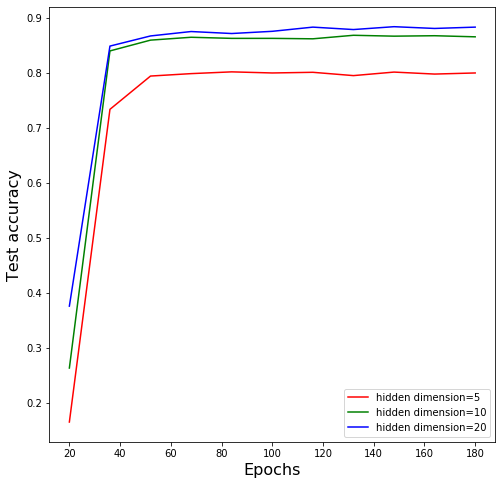

In [19]:
# YOUR CODE HERE
# YOUR CODE HERE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

epochs = [0] + list(range(20,201,20))

ax.plot(epochs, nns[0].acc_test_array,'r', label="hidden dimension=5")
ax.plot(epochs, nns[1].acc_test_array,'g', label="hidden dimension=10")
ax.plot(epochs, nns[2].acc_test_array,'b', label="hidden dimension=20")

ax.set_xlabel("Epochs", fontsize=16)
ax.set_ylabel("Test accuracy", fontsize=16)
ax.set_xticklabels(epochs)
ax.legend()

Give your explanation below.

With increasing number of hidden layers, number of neurons increases with which, both test and train accuracies have improved. This means that the model has learned a complex function or it has figured out the important features in a more accurate way. 

If we use way too less neurons, it might result in underfitting (Example, XNOR using single layer perceptron). And use of too many neurons will result in overfitting, wherein the train accuracy increases and test accuracy decreases because of lower generalization.

**Extra Credit [10 points]:** Implement dropout by filling the `back_prop_dropout` function and update the `SGD_train` function to use it. Explain the impact of dropout on performance.

In [20]:
hidden_layer_dimensions = 60
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions], keep_prob=0.5)
nn.SGD_train(train, epochs=400, eta=0.1, lam=0, verbose=True, test=test)

Epoch    1: Train    0.21289, Test    0.20168
Epoch   20: Train    0.86595, Test    0.78752
Epoch   40: Train    0.90316, Test    0.83713
Epoch   60: Train    0.91757, Test    0.85194
Epoch   80: Train    0.92797, Test    0.85554
Epoch  100: Train    0.93037, Test    0.85154
Epoch  120: Train    0.93958, Test    0.85874
Epoch  140: Train    0.94558, Test    0.86395
Epoch  160: Train    0.94638, Test    0.86795
Epoch  180: Train    0.94998, Test    0.86875
Epoch  200: Train    0.95318, Test    0.87035
Epoch  220: Train    0.95518, Test    0.87075
Epoch  240: Train    0.95718, Test    0.87275
Epoch  260: Train    0.95878, Test    0.87395
Epoch  280: Train    0.96038, Test    0.87715
Epoch  300: Train    0.96038, Test    0.87155
Epoch  320: Train    0.96238, Test    0.87475
Epoch  340: Train    0.96479, Test    0.87595
Epoch  360: Train    0.96639, Test    0.88075
Epoch  380: Train    0.96639, Test    0.88235
Epoch  400: Train    0.96639, Test    0.87915


When we drop some nodes at random as part of dropout, it acts as regularization for the model. Dropout will help in preventing overfitting and results in better generalization as number of neurons in the model decreases. Thus, noise has damped effect on the model as it learns robust features.

But dropping too many nodes will result in underfitting as the model will not have enough neurons for learning.

[25 Points] Problem 4 - Implement RNN Network to classify whether text is spam or ham 
---

Dataset is obtained from UCI Machine Learning repository consisting of SMS tagged messages (labelled as either **ham** (legitimate) or **spam**) that have been collected for SMS Spam research.

We will now use [Keras](https://keras.io/) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for CPU-only of [TensorFlow](https://www.tensorflow.org/install) (version: 2.0.0) as the backend for Keras. We will use [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) as our Keras API.

Update the snippet below to build a Sequential model with an embedding layer, and an LSTM layer, and a dense layer. This question allows you to get familiar with popular deep learning toolkits and the solution only has a few lines. In practice, there is no need to reinvent the wheels.


Learn more about RNN : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Part 1 [15 points]:** Complete the following functions `init`, `train`, and `evaluate` functions and report the accuracy

In [21]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer


class RNN:
    '''
    RNN classifier
    '''

    def __init__(self, train_x, train_y, test_x, test_y, dict_size=5000,
                 example_length=150, embedding_length=32, epoches=5, batch_size=128):
        '''
        initialize RNN model
        :param train_x: training data
        :param train_y: training label
        :param test_x: test data
        :param test_y: test label
        :param epoches: number of ephoches to run
        :param batch_size: batch size in training
        :param embedding_length: size of word embedding
        :param example_length: length of examples
        '''
        self.batch_size = batch_size
        self.epoches = epoches
        self.example_len = example_length
        self.dict_size = dict_size
        self.embedding_len = embedding_length

        # preprocess training data
        tok = Tokenizer(num_words=dict_size)
        tok.fit_on_texts(train_x)
        sequences = tok.texts_to_sequences(train_x)
        self.train_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)
        sequences = tok.texts_to_sequences(test_x)
        self.test_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)

        self.train_y = train_y
        self.test_y = test_y

        # TODO: build model with Embedding, LSTM and dense layers.
        # Please refer to Sequence classification with LSTM : 
        #     https://keras.io/getting-started/sequential-model-guide/#examples
        # Documentation for LSTM layer in : 
        #     https://keras.io/layers/recurrent/#lstm
        self.model = Sequential()
        # YOUR CODE HERE
        self.model.add(Embedding(self.dict_size, self.embedding_len, input_length=self.example_len))
        self.model.add(LSTM(64))
        self.model.add(Dense(1, activation='sigmoid'))
        
        self.model.compile(loss='binary_crossentropy',
                           optimizer='adam', metrics=['accuracy'])

    def train(self, verbose=0):
        '''
        fit in data and train model
        please refer to the fit method in https://keras.io/models/model/#fit
        make sure you use batchsize and epochs appropriately.
        :return: None
        '''
        # TODO: fit in data to train your model
        # YOUR CODE HERE
        return self.model.fit(self.train_x, self.train_y, batch_size=self.batch_size, epochs = self.epoches, verbose=verbose)
        
    def evaluate(self):
        '''
        evaluate trained model
        please refer to the evaluate method in https://keras.io/models/model/#evaluate
        :return: [loss, accuracy]
        '''
        return self.model.evaluate(self.test_x, self.test_y, batch_size=self.batch_size)



In [22]:
import pickle
def load_data(location):
    return pickle.load(open(location,'rb'))

In [23]:
train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')
rnn = RNN(train_x, train_y, test_x, test_y, epoches=5)
rnn.train(verbose=1)
loss, accuracy = rnn.evaluate()
print('Accuracy for LSTM: ', accuracy)

Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.4281 - accuracy: 0.8552
Epoch 2/5
4736/4736 [==============================] - 3s 734us/sample - loss: 0.1406 - accuracy: 0.9550
Epoch 3/5
4736/4736 [==============================] - 3s 733us/sample - loss: 0.0552 - accuracy: 0.9850
Epoch 4/5
4736/4736 [==============================] - 3s 732us/sample - loss: 0.0295 - accuracy: 0.9920
Epoch 5/5
4736/4736 [==============================] - 4s 744us/sample - loss: 0.0190 - accuracy: 0.9951
836/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.99760765


Accuracy for LSTM:  0.99760765

**Part 2 [10 points]:** 
* Change the embedding length and experiment with these values: [8, 16, 32, 48, 64].
* Plot training accuracies of different embedding lengths vs. epochs.
* Observe and explain the impact of embedding length in LSTM Model.

In [24]:
RNNs = []
test_accuracy_array = []
for embedding_len in [8, 16, 32, 48, 64]:
    train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')
    rnn = RNN(train_x, train_y, test_x, test_y, epoches=5, embedding_length=embedding_len)
    RNNs.append(rnn)
    rnn.train(verbose=1)
    loss, accuracy = rnn.evaluate()
    test_accuracy_array.append(accuracy)
    print('Accuracy for LSTM: ', accuracy)

train_accuracy_matrix = np.array(list(map(lambda x: x.model.history.history["accuracy"], RNNs)))

Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 5s 998us/sample - loss: 0.4835 - accuracy: 0.8547
Epoch 2/5
4736/4736 [==============================] - 3s 721us/sample - loss: 0.2984 - accuracy: 0.8845
Epoch 3/5
4736/4736 [==============================] - 3s 722us/sample - loss: 0.1210 - accuracy: 0.9723
Epoch 4/5
4736/4736 [==============================] - 3s 723us/sample - loss: 0.0636 - accuracy: 0.9846
Epoch 5/5
4736/4736 [==============================] - 3s 725us/sample - loss: 0.0435 - accuracy: 0.9890
836/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.98086125
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.4735 - accuracy: 0.8560
Epoch 2/5
4736/4736 [==============================] - 4s 757us/sample - loss: 0.1976 - accuracy: 0.9240
Epoch 3/5
4736/4736 [==============================] - 4s 818us/sample - loss: 0.0711 - accuracy: 0.9829
Epoch 4/5
4736/4736 [==============================] - 4s 742us/sample - loss: 0.0395 - accuracy: 0.9886
Epoch 5/5
4736/4736 [==============================] - 4s 798us/sample - loss: 0.0249 - accuracy: 0.9939
836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.98444974
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.4625 - accuracy: 0.8596
Epoch 2/5
4736/4736 [==============================] - 4s 749us/sample - loss: 0.1660 - accuracy: 0.9455
Epoch 3/5
4736/4736 [==============================] - 4s 771us/sample - loss: 0.0640 - accuracy: 0.9863
Epoch 4/5
4736/4736 [==============================] - 4s 773us/sample - loss: 0.0350 - accuracy: 0.9922
Epoch 5/5
4736/4736 [==============================] - 4s 774us/sample - loss: 0.0226 - accuracy: 0.9954
836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9952153
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.4272 - accuracy: 0.8537
Epoch 2/5
4736/4736 [==============================] - 4s 910us/sample - loss: 0.1208 - accuracy: 0.9702
Epoch 3/5
4736/4736 [==============================] - 4s 926us/sample - loss: 0.0457 - accuracy: 0.9894
Epoch 4/5
4736/4736 [==============================] - 4s 924us/sample - loss: 0.0262 - accuracy: 0.9937
Epoch 5/5
4736/4736 [==============================] - 4s 903us/sample - loss: 0.0152 - accuracy: 0.9962
836/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9952153
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 6s 1ms/sample - loss: 0.4186 - accuracy: 0.8543
Epoch 2/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.1114 - accuracy: 0.9692
Epoch 3/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.0456 - accuracy: 0.9880
Epoch 4/5
4736/4736 [==============================] - 5s 1000us/sample - loss: 0.0241 - accuracy: 0.9945
Epoch 5/5
4736/4736 [==============================] - 5s 1000us/sample - loss: 0.0152 - accuracy: 0.9964
836/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9952153


Plot training results below.

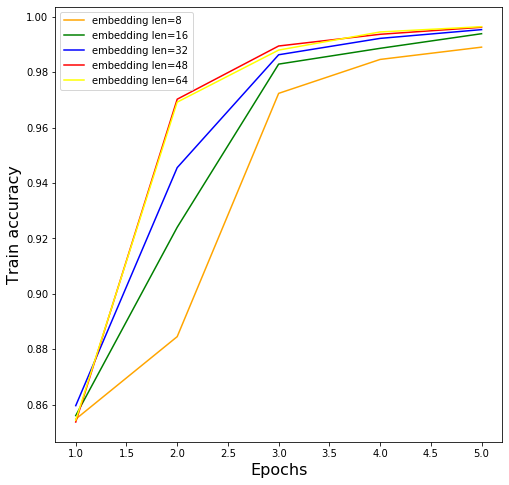

In [27]:
# YOUR CODE HERE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

epochs = [1,2,3,4,5]
colors = ['orange','green','blue','red','yellow']

for i,en in enumerate([8, 16, 32, 48, 64]):
    ax.plot(epochs, train_accuracy_matrix[i],colors[i], label='embedding len='+str(en))

ax.set_xlabel("Epochs", fontsize=16)
ax.set_ylabel("Train accuracy", fontsize=16)
ax.legend()

Give your observation and explanation below.

With increasing embedding length, the information provided by the input vector increases. It has a better way of representing semantics with longer embedding vectors. We can see that train accuracy has increased and also has converged earlier with increasing embedded length.

Shorter embeddings will not provide enough information and might result in underfitting.

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/6Kf72C26am1SAjtg6) to solicit your feedback for how to improve the course.